In [1]:
import pandas as pd
import lxml as lxml
import numpy as np
import html5lib as ht
from pandas.io.html import read_html
import matplotlib.pyplot as plt
!easy_install xlsxwriter

Searching for xlsxwriter
Best match: XlsxWriter 1.2.8
Processing XlsxWriter-1.2.8-py2.7.egg
XlsxWriter 1.2.8 is already the active version in easy-install.pth
Installing vba_extract.py script to /usr/local/bin

Using /usr/local/lib/python2.7/dist-packages/XlsxWriter-1.2.8-py2.7.egg
Processing dependencies for xlsxwriter
Finished processing dependencies for xlsxwriter


In [0]:
pl1 = 'https://www.moneycontrol.com/financials/marutisuzukiindia/results/yearly/MS24#MS24'
pl2 = pl1.replace('#','/2#')
pl3 = pl1.replace('#','/3#')
bl1 = pl1.replace('results/yearly','balance-sheetVI')
bl2 = bl1.replace('#','/2#')
bl3 = bl1.replace('#','/3#')

In [0]:
p1 = pd.read_html(pl1,index_col=0,header=0)[0]
p2 = pd.read_html(pl2,index_col=0,header=0)[0]
p3 = pd.read_html(pl3,index_col=0,header=0)[0]

In [0]:
b1 = pd.read_html(bl1,index_col=0,header=0)[0]
b2 = pd.read_html(bl2,index_col=0,header=0)[0]
b3 = pd.read_html(bl3,index_col=0,header=0)[0]

In [0]:
index = p1.index.name
index2 = b1.index.name

In [0]:
p = p1.merge(p2, on = index).merge(p3, on = index)
b = b1.merge(b2, on = index2).merge(b3, on = index2)

In [0]:
p = p[:25]
b=b[:42]
b = b.drop([b1.index[0]])
p.columns = b.columns
f = p.append(b)

In [0]:
f =f.replace("--",0)
f = f.sort_index(axis=1 ,ascending=True)
f = f.drop(f.columns[[-3,-2,-1]], axis = 1)
f = f.apply(pd.to_numeric) 

In [9]:
corr = f.T.corr()
r =  corr.iat[1,1]
corr = corr.replace(to_replace = r, value = int(.001))
max_corrwith  = corr.idxmax(axis=1)
r2 =  corr.iat[3,0]
corrs = corr.replace(r2,0)
corrs = corrs.style.background_gradient(cmap='Blues')
corrs

In [10]:
YoY = (f/f.shift(periods=1, axis='columns'))-1
YoY = YoY.fillna(0)
i = YoY.iat[2,2]
YoY = YoY.replace(i,0)
YoY

,Mar 05,Mar 06,Mar 07,Mar 08,Mar 09,Mar 10,Mar 11,Mar 12,Mar 13,Mar 14,Mar 15,Mar 16,Mar 17,Mar 18,Mar 19
Net Sales/Income from operations,0.0,0.105676,0.166255,0.038034,0.167536,0.420596,0.225390,-0.043908,0.227819,0.000756,0.139777,0.161209,0.185471,0.167322,0.063014
Other Operating Income,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190248,0.106866,0.082533,0.292877,-0.196475,0.025982,0.473165,0.805778
Total Income From Operations,0.0,0.000000,0.000000,0.038034,0.167536,0.420596,0.250382,-0.039228,0.224824,0.002586,0.143476,0.151438,0.182430,0.172381,0.078453
EXPENDITURE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Consumption of Raw Materials,0.0,0.099798,0.147285,0.215188,0.157577,0.424440,0.270688,-0.033067,0.144986,-0.054557,0.136294,0.081870,0.201379,0.054228,0.001838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cash And Cash Equivalents,0.0,0.361570,0.015126,-0.772280,4.984568,-0.949355,24.544807,-0.028862,-0.681869,-0.187484,-0.970939,1.306011,-0.672986,4.152174,1.516174
Short Term Loans And Advances,0.0,0.200296,0.185345,0.115221,0.612540,-0.043561,-0.587073,0.138531,0.432995,0.121761,-0.062585,-0.873977,-0.983085,0.200000,4.333333
OtherCurrentAssets,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950259,0.435441,-0.337035,-0.091011,5.587531,-0.011749,-0.052979,-0.260187
Total Current Assets,0.0,0.261642,0.025683,-0.196313,0.776538,-0.312997,1.550154,0.151639,-0.012005,0.294692,-0.421530,-0.042926,0.118557,-0.097400,0.560532


In [11]:
fi = f.copy()
fi['mean']= YoY.T.mean(axis=0)
fi['std']=YoY.T.std(axis=0)
fi['max_corrwith']=max_corrwith
fi['max_corrvalur']=corr.max(axis=1)
N = fi.iat[3,0]
fi =fi.replace(N,"")
fi

,Mar 05,Mar 06,Mar 07,Mar 08,Mar 09,Mar 10,Mar 11,Mar 12,Mar 13,Mar 14,Mar 15,Mar 16,Mar 17,Mar 18,Mar 19,mean,std,max_corrwith,max_corrvalur
Net Sales/Income from operations,13343.1,14753.1,17205.9,17860.3,20852.5,29623,36299.7,34705.9,42612.6,42644.8,48605.5,56441.2,66909.4,78104.8,83026.5,0.134996,0.116001,Total Shareholders Funds,0.993584
Other Operating Income,0,0,0,0,0,0,740.35,881.2,975.37,1055.87,1365.11,1096.9,1125.4,1657.9,2993.8,0.118732,0.245122,Trade Receivables,0.924891
Total Income From Operations,0,0,17205.9,17860.3,20852.5,29623,37040.1,35587.1,43587.9,43700.6,49970.6,57538.1,68034.8,79762.7,86020.3,0.119527,0.125233,Other Expenses,0.986209
EXPENDITURE,,,,,,,,,,,,,,,,0.000000,0.000000,,
Consumption of Raw Materials,8583.67,9440.3,10830.7,13161.4,15235.3,21701.7,27576.1,26664.3,30530.2,28864.6,32798.7,35483.9,42629.6,44941.3,45023.9,0.123196,0.126043,Total Income From Operations,0.982264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cash And Cash Equivalents,1029.4,1401.6,1422.8,324,1939,98.2,2508.5,2436.1,775,629.7,18.3,42.2,13.8,71.1,178.9,2.174444,6.442829,Long Term Loans And Advances,0.348359
Short Term Loans And Advances,676.5,812,962.5,1073.4,1730.9,1655.5,683.6,778.3,1115.3,1251.1,1172.8,147.8,2.5,3,16,0.252649,1.213776,Long Term Borrowings,0.783353
OtherCurrentAssets,0,0,0,0,0,0,193,376.4,540.3,358.2,325.6,2144.9,2119.7,2007.4,1485.1,0.414685,1.462048,Other Non-Current Assets,0.939256
Total Current Assets,2972,3749.6,3845.9,3090.9,5491.1,3772.4,9620.2,11079,10946,14171.7,8197.9,7846,8776.2,7921.4,12361.6,0.177084,0.490516,Current Investments,0.940846


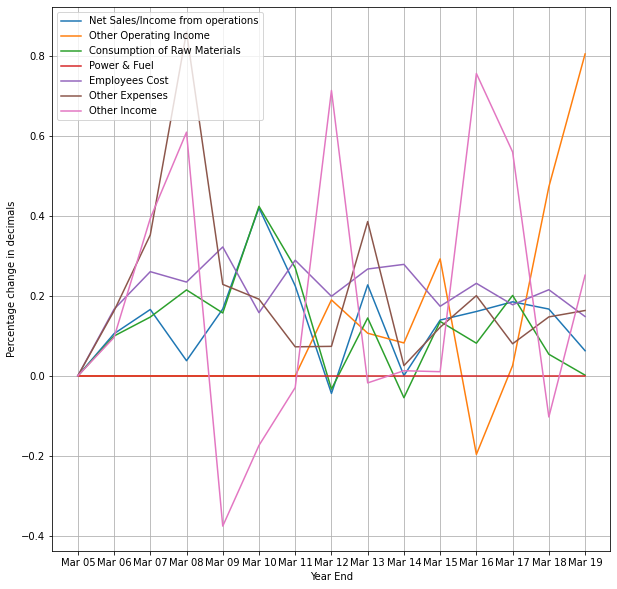

In [12]:
plt.figure(figsize = (10,10))

list = YoY.iloc[[0,1,4,7,8,15,17]].index.tolist()
for v in list:
  plt.plot(YoY.T.index, YoY.T[v],label = v )
plt.legend()
plt.xlabel('Year End')
plt.ylabel('Percentage change in decimals')
plt.savefig('YoY P&l change %.png')
plt.grid()

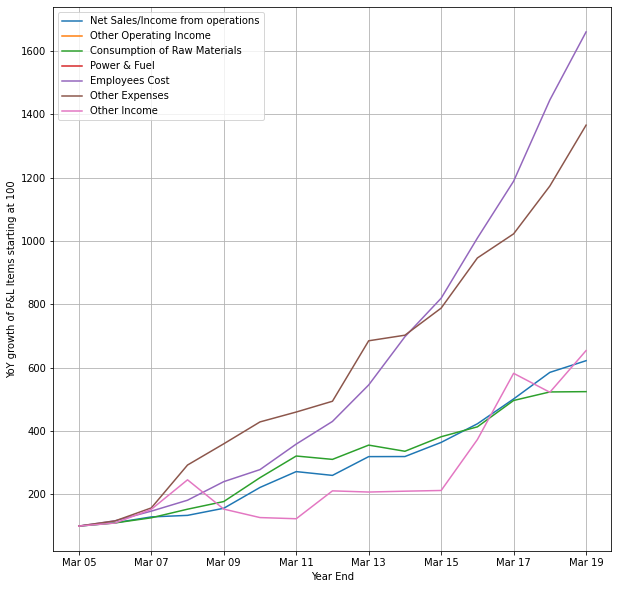

In [13]:
import pylab
plt.figure(figsize = (10,10))

list = f.iloc[[0,1,4,7,8,15,17]].index.tolist()
for v in list:
  ((f.T[v])/(f.T[v]).iloc[0]*100).plot(kind = 'line')
plt.legend()
plt.xlabel('Year End')
plt.ylabel('YoY growth of P&L Items starting at 100')
plt.savefig('YoY P&l change.png')
plt.grid()

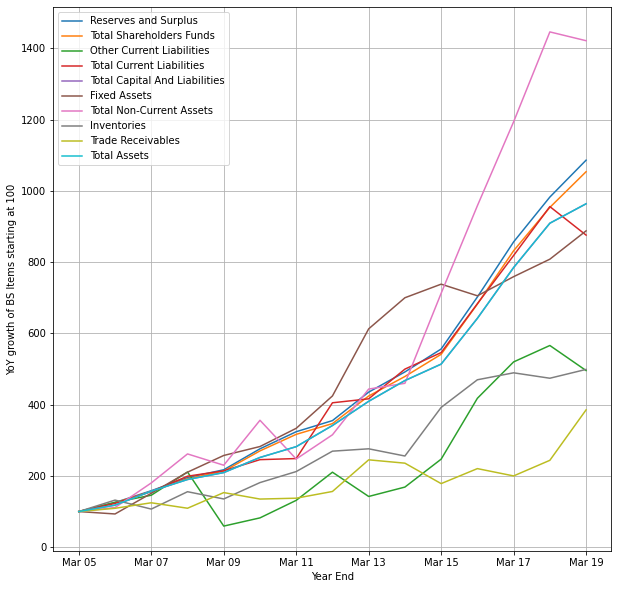

In [14]:
import pylab
plt.figure(figsize = (10,10))

list = f.iloc[[29,31,41,43,44,51,56,59,60,65]].index.tolist()
for v in list:
  ((f.T[v])/(f.T[v]).iloc[0]*100).plot(kind = 'line')
plt.legend()
plt.xlabel('Year End')
plt.ylabel('YoY growth of BS Items starting at 100')
plt.savefig('YoY BS change.png')
plt.grid()

In [0]:
a = pd.DataFrame(f["Mar 19"])
a['Mar 20']= a['Mar 19']*(YoY["Mar 10"]+1)
a['Mar 21']= a['Mar 20']*(YoY["Mar 11"]+1)
a['Mar 22']= a['Mar 21']*(YoY["Mar 12"]+1)
a['Mar 23']= a['Mar 22']*(YoY["Mar 13"]+1)
a['Mar 24']= a['Mar 23']*(YoY["Mar 14"]+1)
a['Mar 25']= a['Mar 24']*(YoY["Mar 15"]+1)
a['Mar 26']= a['Mar 25']*(YoY["Mar 16"]+1)
a['Mar 27']= a['Mar 26']*(YoY["Mar 17"]+1)
a['Mar 28']= a['Mar 27']*(YoY["Mar 18"]+1)
a['Mar 29']= a['Mar 28']*(YoY["Mar 19"]+1)

In [0]:
a=a.T
a['Total Income']=a.iloc[:, 0:2].sum(axis=1)
a['Expenses Total']= a.iloc[:, 4:16].sum(axis=1)

In [0]:
a['Profit before tax']= a['Total Income']+a['Other Income']+a['Interest']-a['Expenses Total']

In [0]:
Tax_rate = .25

In [0]:
a['Profit after tax']= a['Profit before tax']*(1-Tax_rate)

In [0]:
a['FCFF']= a['Profit after tax']+a['Depreciation']

In [21]:
a=a.T
a

,Mar 19,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29
Net Sales/Income from operations,83026.5,117947.127722,144531.229948,138185.148658,169666.386261,169794.593945,193528.026183,224726.569825,266406.808343,310982.470090,330578.735915
Other Operating Income,2993.8,2993.800000,2993.800000,3563.364031,3944.165200,4269.688129,5520.181425,4435.603728,4550.850976,6704.154819,12106.217924
Total Income From Operations,86020.3,122200.108529,152796.863584,146802.983904,179807.851280,180272.758534,206137.648783,237354.747696,280655.475043,329035.118192,354848.815016
EXPENDITURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumption of Raw Materials,45023.9,64133.850030,81494.119862,78799.383030,90224.168804,85301.800589,96927.956510,104863.488813,125980.756983,132812.388430,133056.491366
...,...,...,...,...,...,...,...,...,...,...,...
Total Income,86020.3,120940.927722,147525.029948,141748.512688,173610.551461,174064.282074,199048.207608,229162.173553,270957.659318,317686.624909,342684.953839
Expenses Total,78039.9,100027.012312,120383.134621,123215.652703,150550.878751,154729.429946,174781.667177,198558.232535,238312.217569,319190.375370,388801.087431
Profit before tax,10617.2,23079.337538,29232.261942,22136.398922,26801.647218,23100.900630,28114.414001,36947.258801,42487.629132,7721.676536,-35096.586735
Profit after tax,7962.9,17309.503154,21924.196457,16602.299191,20101.235414,17325.675472,21085.810501,27710.444101,31865.721849,5791.257402,-26322.440051


In [0]:
writer = pd.ExcelWriter('company financials.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
fi.to_excel(writer, sheet_name='Historic data')
a.to_excel(writer, sheet_name='Projections')
corrs.to_excel(writer, sheet_name='Corr table')

# Close the Pandas Excel writer and output the Excel file.
writer.save()